###  Dental_Implant_Sandblasting  project:

- The focus should be on experimenting with different machine learning models and hyperparameters to determine the best approach for predicting optimal sandblasting conditions and performance metrics. Here are the key sections you should include:

#### 1.Introduction :
- Briefly describe the objective of the notebook.
- State the specific experiments you will be conducting.

#### 2.Data Loading and Exploration :
- Load the dataset.
- Perform initial data exploration (e.g., summary statistics, visualizations).

#### 3.Data Preprocessing :
- Handle missing values, if any.
- Normalize or standardize features.
- Split the data into training and testing sets.

#### 4.Feature Engineering :
- Create any new features that might help improve model performance.
- Consider interaction terms, polynomial features, etc.

#### 5.Model Training :
- Experiment with different models (e.g., Linear Regression, Random Forest, Gradient Boosting, Neural Networks).
- Use cross-validation to evaluate model performance.
- Track and log the performance of each model.

#### 6.Hyperparameter Tuning :
- Perform hyperparameter tuning using Grid Search or Random Search.
- Document the best hyperparameters and model performance.

#### 7.Model Evaluation :
- Evaluate the best model on the test set.
- Use appropriate metrics for Surface Roughness and Cell Viability.
- Analyze residuals and other diagnostic plots.

#### 8.Conclusion :
- Summarize the findings from the experiments.
- State which model and hyperparameters performed the best.
- Outline next steps or future experiments.

----------------------------------------------------------------------------------------------------------------------------

### 1.Introduction :

#### Objective

This notebook aims to develop and evaluate machine learning models for predicting the optimal sandblasting conditions in dental implant manufacturing. The key objectives are:

1. **Predict Average Surface Roughness (Sa)**: Train models to forecast surface roughness and ensure predictions fall within the optimal range of 1.5 < Sa < 2.5 micrometers.

2. **Predict Cell Viability**: Assess the biocompatibility of the implant surface by predicting cell viability, with a focus on achieving predictions greater than 90%.

3. **Implement Rules for Validation**:
   - **Surface Roughness Rule**: Only proceed with cell viability predictions if Sa is within the specified range.
   - **Cell Viability Rule**: Color code predictions based on their validity (green for valid, red for invalid).

4. **Experiment with Various Models**: Explore different machine learning algorithms and perform hyperparameter tuning to find the best model for each prediction task.

5. **Provide Recommendations**: Use model insights to recommend optimal sandblasting conditions that enhance implant surface quality and cell viability.

This approach aims to improve the design of dental implants by leveraging data-driven insights into the sandblasting process, ultimately leading to better implant performance and osseointegration.


### 2.Data Loading and Exploration :


In [29]:
## 2. Data Loading and Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check current working directory
print("Current working directory:", os.getcwd())

Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [30]:
# Define the path to the dataset
# Adjusted relative path to go up one level from 'research' directory
data_path = '../data/Sandblasting-Condition.csv'

In [31]:
# Check if the file exists at the specified path
if not os.path.exists(data_path):
    # If the file is not found, raise an error with an absolute path suggestion
    absolute_data_path = os.path.abspath(data_path)
    raise FileNotFoundError(f"File not found: {data_path}\nAbsolute path suggestion: {absolute_data_path}")

In [32]:
# Load the dataset
data = pd.read_csv(data_path)

In [33]:
# Display the first few rows of the dataset
print(data.head())

   Angle of Sandblasting  Pressure of Sandblasting (bar)  \
0                     30                               3   
1                     40                               3   
2                     50                               3   
3                     30                               4   
4                     40                               4   

   Temperture of Acid Etching  Time of Acid Etching (min)  \
0                          25                           3   
1                          25                           3   
2                          25                           3   
3                          25                           3   
4                          25                           3   

   Voltage of Anodizing (v)  Time of  Anodizing (min)  \
0                        80                         1   
1                        80                         1   
2                        80                         1   
3                        80                 

In [34]:
# Display the first few rows of the dataset
print(data.head())

   Angle of Sandblasting  Pressure of Sandblasting (bar)  \
0                     30                               3   
1                     40                               3   
2                     50                               3   
3                     30                               4   
4                     40                               4   

   Temperture of Acid Etching  Time of Acid Etching (min)  \
0                          25                           3   
1                          25                           3   
2                          25                           3   
3                          25                           3   
4                          25                           3   

   Voltage of Anodizing (v)  Time of  Anodizing (min)  \
0                        80                         1   
1                        80                         1   
2                        80                         1   
3                        80                 

In [35]:
# Check the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           68 non-null     int64  
 1   Pressure of Sandblasting (bar)                  68 non-null     int64  
 2   Temperture of Acid Etching                      68 non-null     int64  
 3   Time of Acid Etching (min)                      68 non-null     int64  
 4   Voltage of Anodizing (v)                        68 non-null     int64  
 5   Time of  Anodizing (min)                        68 non-null     int64  
 6   (Sa) Average of Surface roughness (micrometer)  68 non-null     float64
 7   Cell Viability (%)                              68 non-null     int64  
 8   Unnamed: 8                                      0 non-null      float64
dtypes: float64(2), int64(7)
memory usage: 4.9 KB
N

In [36]:
# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)

       Angle of Sandblasting  Pressure of Sandblasting (bar)  \
count              68.000000                       68.000000   
mean               36.617647                        3.897059   
std                 7.651026                        0.755867   
min                30.000000                        3.000000   
25%                30.000000                        3.000000   
50%                30.000000                        4.000000   
75%                40.000000                        4.000000   
max                50.000000                        5.000000   

       Temperture of Acid Etching  Time of Acid Etching (min)  \
count                   68.000000                   68.000000   
mean                    60.294118                    5.426471   
std                     18.444802                    2.332868   
min                     25.000000                    3.000000   
25%                     50.000000                    3.000000   
50%                     75.000000

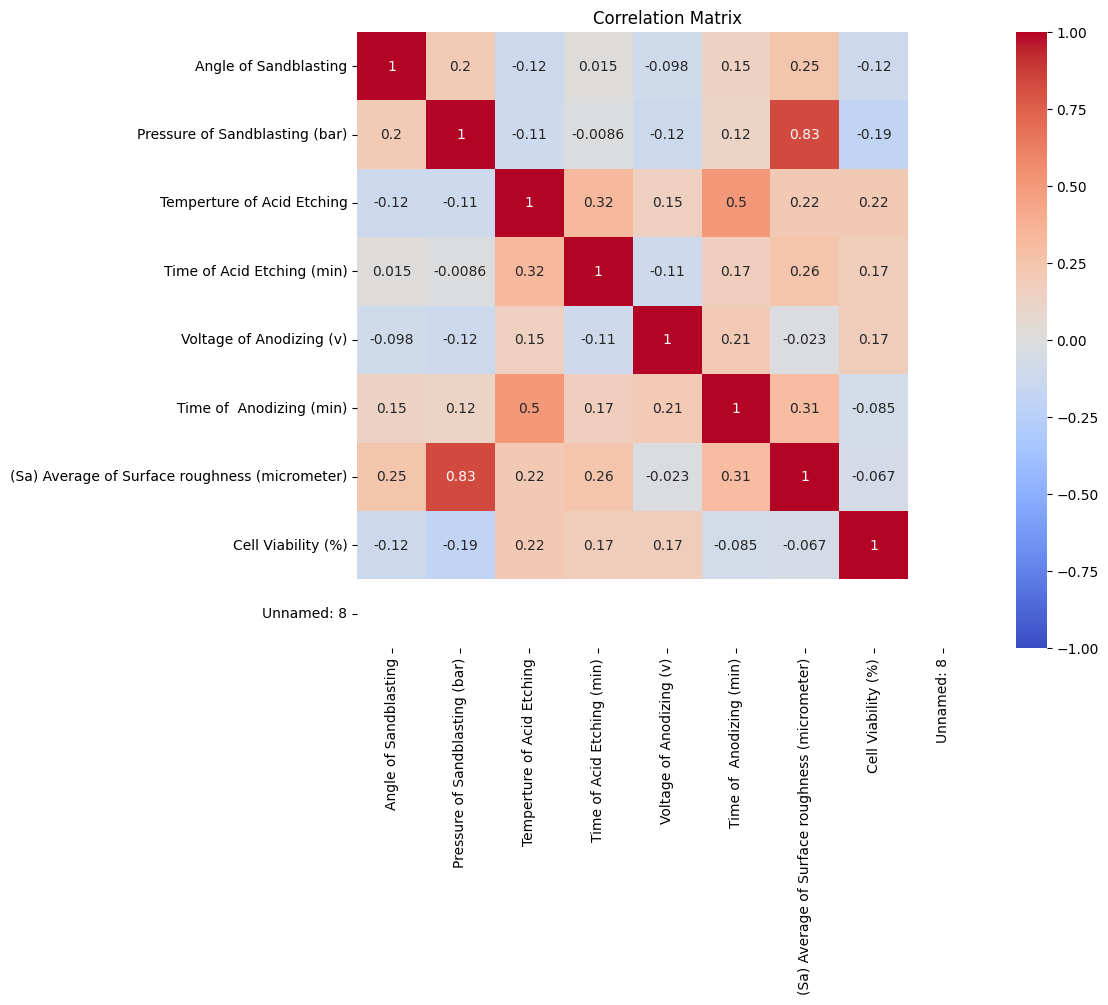

In [75]:
# Correlation Heatmap: Focus on Sa and Cell Viability
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

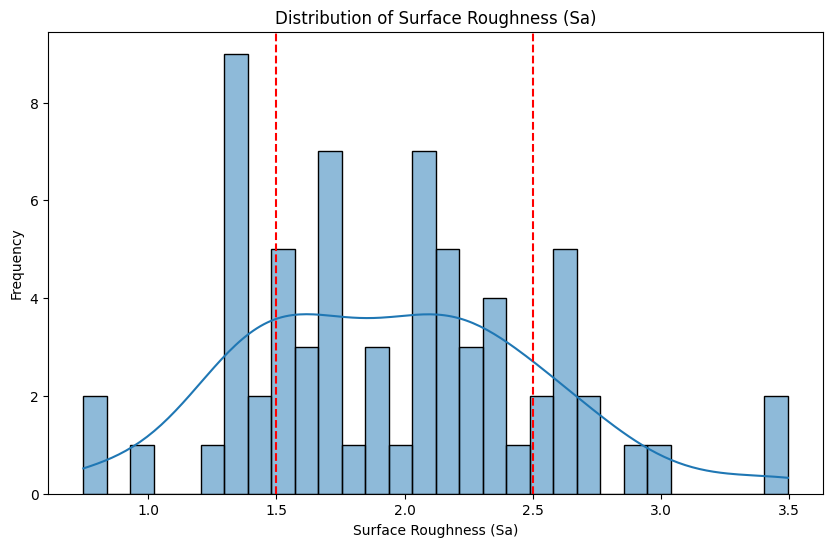

In [73]:
# Histogram: Distribution of Surface Roughness (Sa)
plt.figure(figsize=(10, 6))
sns.histplot(data['(Sa) Average of Surface roughness (micrometer)'], kde=True, bins=30)
plt.axvline(1.5, color='r', linestyle='--')
plt.axvline(2.5, color='r', linestyle='--')
plt.title('Distribution of Surface Roughness (Sa)')
plt.xlabel('Surface Roughness (Sa)')
plt.ylabel('Frequency')
plt.show()

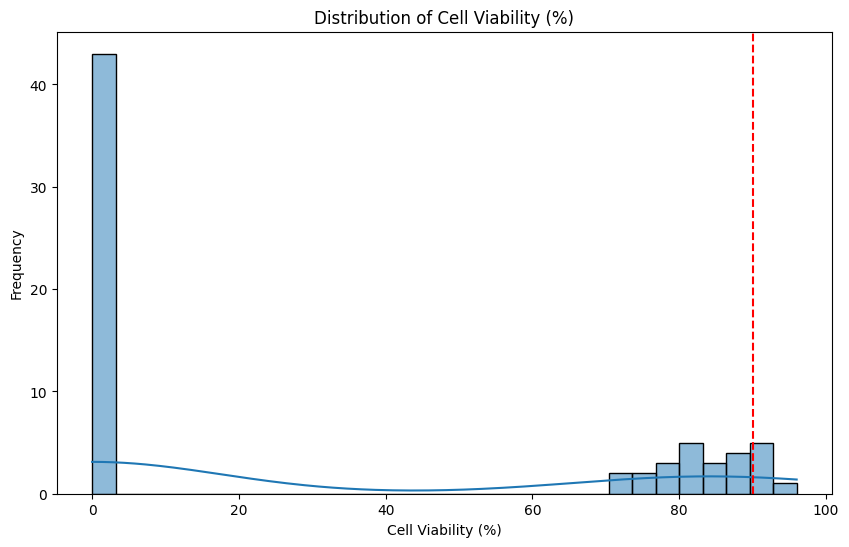

In [74]:
# Histogram: Distribution of Cell Viability
plt.figure(figsize=(10, 6))
sns.histplot(data['Cell Viability (%)'], kde=True, bins=30)
plt.axvline(90, color='r', linestyle='--')
plt.title('Distribution of Cell Viability (%)')
plt.xlabel('Cell Viability (%)')
plt.ylabel('Frequency')
plt.show()

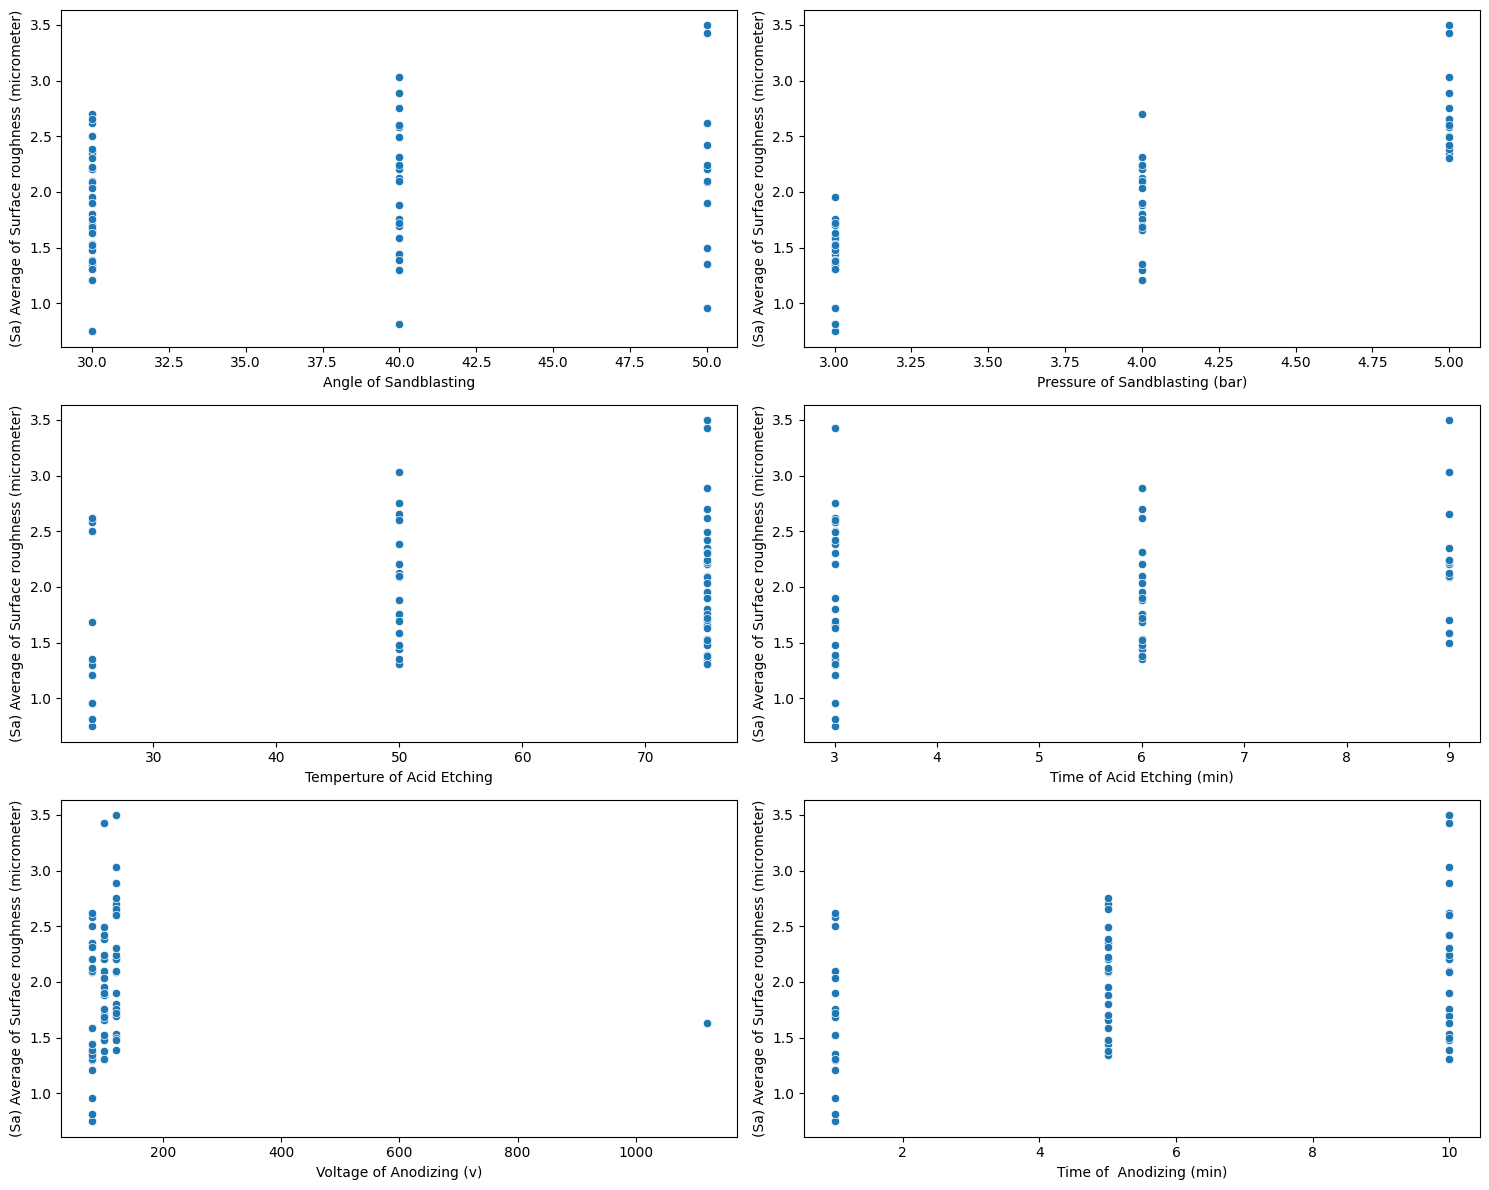

In [45]:
# Visualize the relationship between input features and Surface Roughness (Sa)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.scatterplot(ax=axes[0, 0], data=data, x='Angle of Sandblasting', y='(Sa) Average of Surface roughness (micrometer)')
sns.scatterplot(ax=axes[0, 1], data=data, x='Pressure of Sandblasting (bar)', y='(Sa) Average of Surface roughness (micrometer)')
sns.scatterplot(ax=axes[1, 0], data=data, x='Temperture of Acid Etching', y='(Sa) Average of Surface roughness (micrometer)')
sns.scatterplot(ax=axes[1, 1], data=data, x='Time of Acid Etching (min)', y='(Sa) Average of Surface roughness (micrometer)')
sns.scatterplot(ax=axes[2, 0], data=data, x='Voltage of Anodizing (v)', y='(Sa) Average of Surface roughness (micrometer)')
sns.scatterplot(ax=axes[2, 1], data=data, x='Time of  Anodizing (min)', y='(Sa) Average of Surface roughness (micrometer)')
plt.tight_layout()
plt.show()

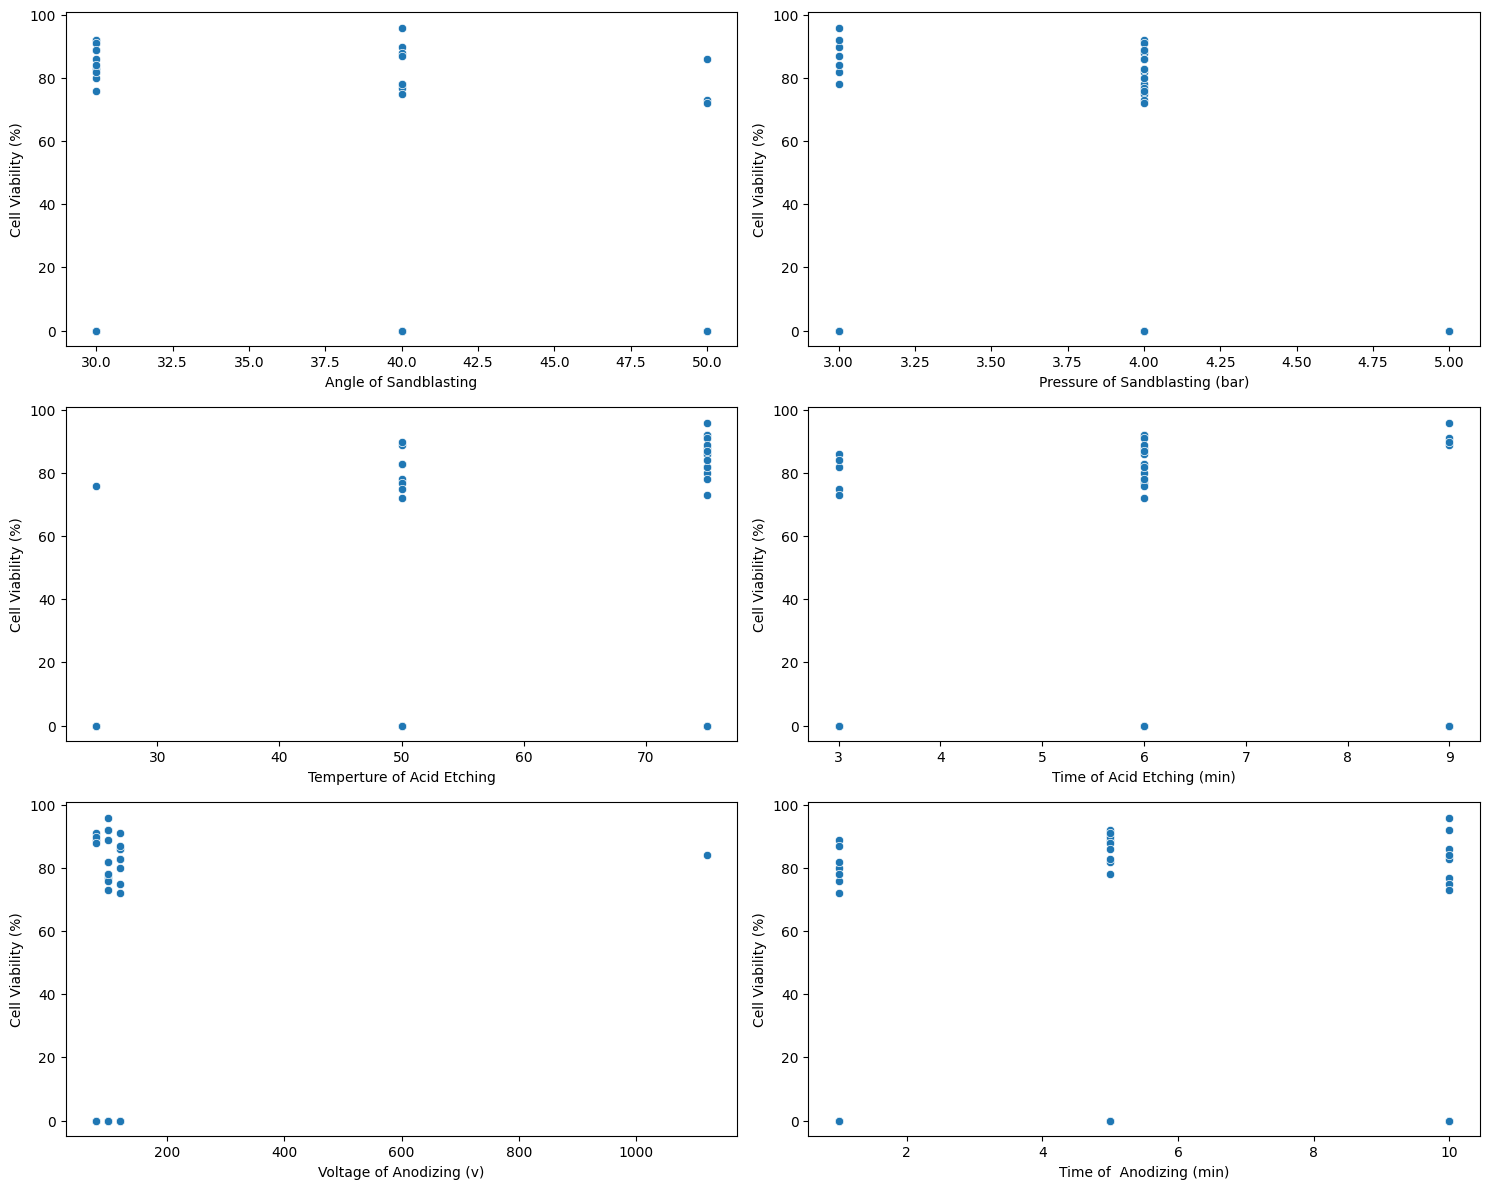

In [46]:
# Visualize the relationship between input features and Cell Viability
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.scatterplot(ax=axes[0, 0], data=data, x='Angle of Sandblasting', y='Cell Viability (%)')
sns.scatterplot(ax=axes[0, 1], data=data, x='Pressure of Sandblasting (bar)', y='Cell Viability (%)')
sns.scatterplot(ax=axes[1, 0], data=data, x='Temperture of Acid Etching', y='Cell Viability (%)')
sns.scatterplot(ax=axes[1, 1], data=data, x='Time of Acid Etching (min)', y='Cell Viability (%)')
sns.scatterplot(ax=axes[2, 0], data=data, x='Voltage of Anodizing (v)', y='Cell Viability (%)')
sns.scatterplot(ax=axes[2, 1], data=data, x='Time of  Anodizing (min)', y='Cell Viability (%)')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sa vs. Angle of Sandblasting')

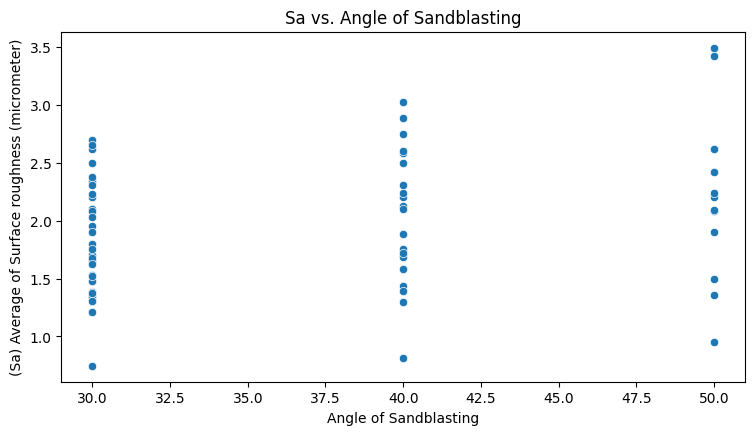

In [54]:
# 1. Scatter Plots: Surface Roughness (Sa) vs. Sandblasting Conditions
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='Angle of Sandblasting', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Angle of Sandblasting')

Text(0.5, 1.0, 'Sa vs. Pressure of Sandblasting')

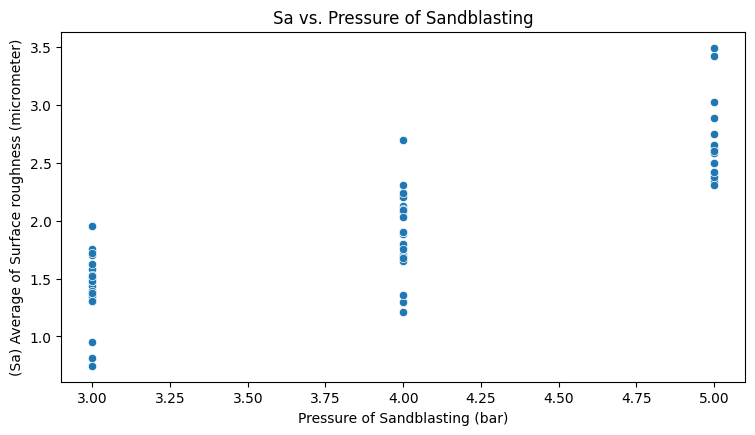

In [56]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='Pressure of Sandblasting (bar)', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Pressure of Sandblasting')

Text(0.5, 1.0, 'Sa vs. Temperature of Acid Etching')

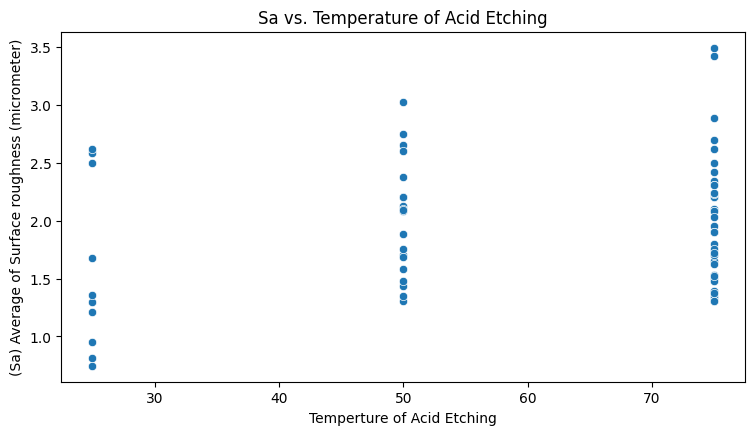

In [57]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='Temperture of Acid Etching', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Temperature of Acid Etching')

Text(0.5, 1.0, 'Sa vs. Time of Acid Etching')

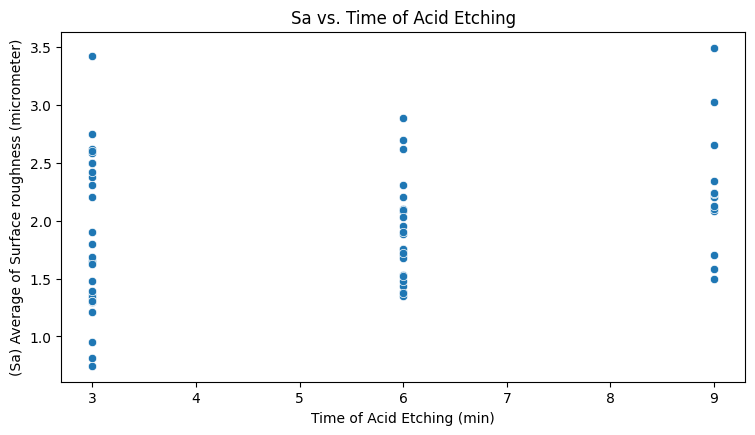

In [58]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='Time of Acid Etching (min)', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Time of Acid Etching')

Text(0.5, 1.0, 'Sa vs. Voltage of Anodizing')

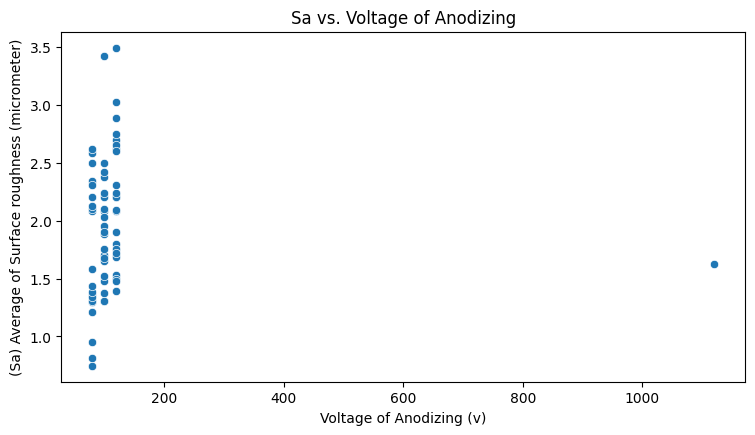

In [64]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 5)
sns.scatterplot(data=data, x='Voltage of Anodizing (v)', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Voltage of Anodizing')



Text(0.5, 1.0, 'Sa vs. Time of Anodizing')

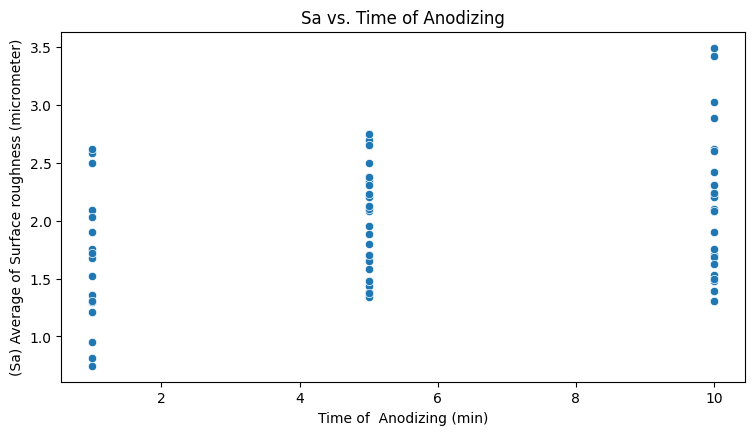

In [65]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 6)
sns.scatterplot(data=data, x='Time of  Anodizing (min)', y='(Sa) Average of Surface roughness (micrometer)')
plt.title('Sa vs. Time of Anodizing')



In [66]:
# 2. Scatter Plots: Cell Viability vs. Sandblasting Conditions (for valid Sa values)
# Apply Surface Roughness Rule
valid_sa = data[(data['(Sa) Average of Surface roughness (micrometer)'] > 1.5) & (data['(Sa) Average of Surface roughness (micrometer)'] < 2.5)]

Text(0.5, 1.0, 'Cell Viability vs. Angle of Sandblasting')

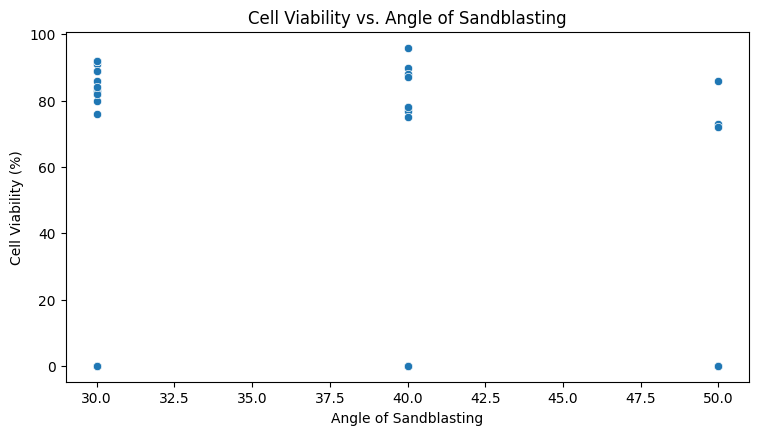

In [67]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=valid_sa, x='Angle of Sandblasting', y='Cell Viability (%)')
plt.title('Cell Viability vs. Angle of Sandblasting')

Text(0.5, 1.0, 'Cell Viability vs. Pressure of Sandblasting')

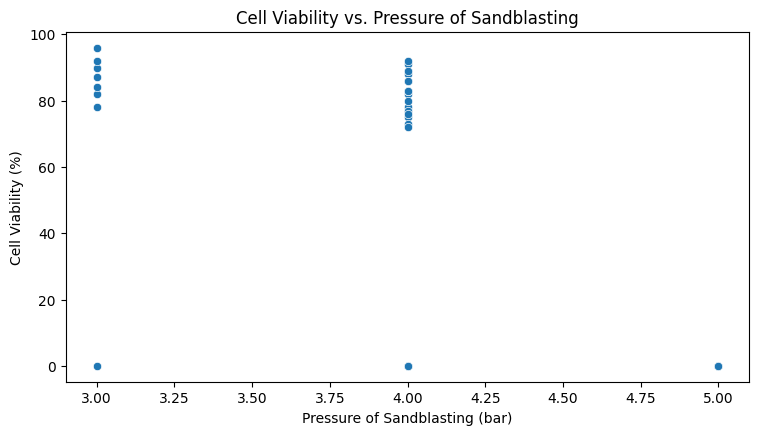

In [68]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 2)
sns.scatterplot(data=valid_sa, x='Pressure of Sandblasting (bar)', y='Cell Viability (%)')
plt.title('Cell Viability vs. Pressure of Sandblasting')

Text(0.5, 1.0, 'Cell Viability vs. Temperature of Acid Etching')

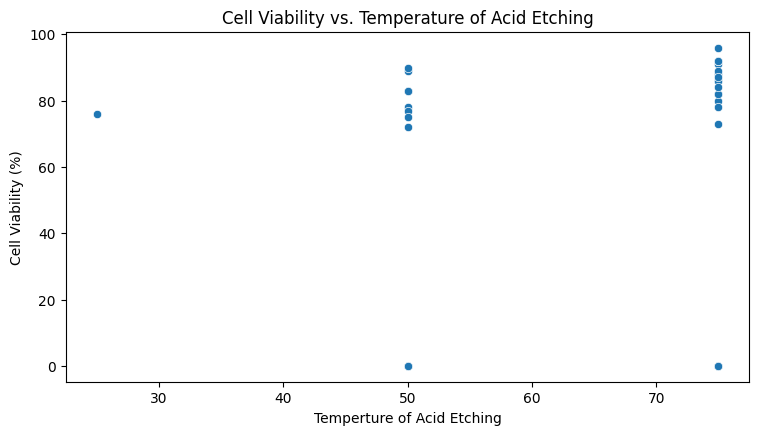

In [69]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 3)
sns.scatterplot(data=valid_sa, x='Temperture of Acid Etching', y='Cell Viability (%)')
plt.title('Cell Viability vs. Temperature of Acid Etching')



Text(0.5, 1.0, 'Cell Viability vs. Time of Acid Etching')

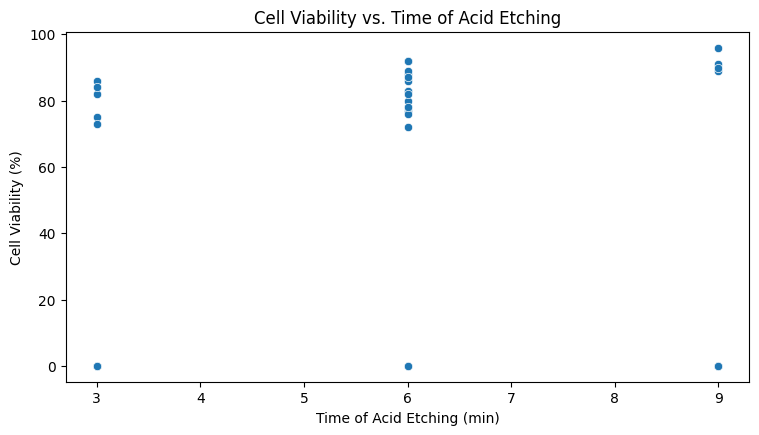

In [70]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 4)
sns.scatterplot(data=valid_sa, x='Time of Acid Etching (min)', y='Cell Viability (%)')
plt.title('Cell Viability vs. Time of Acid Etching')



Text(0.5, 1.0, 'Cell Viability vs. Voltage of Anodizing')

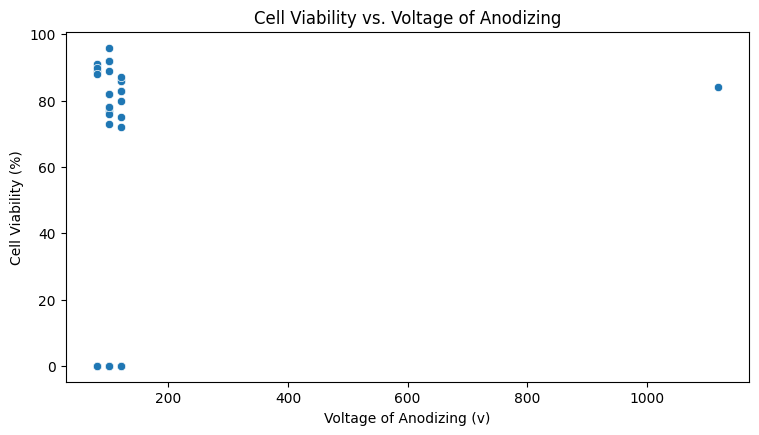

In [71]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 5)
sns.scatterplot(data=valid_sa, x='Voltage of Anodizing (v)', y='Cell Viability (%)')
plt.title('Cell Viability vs. Voltage of Anodizing')



Text(0.5, 1.0, 'Cell Viability vs. Time of Anodizing')

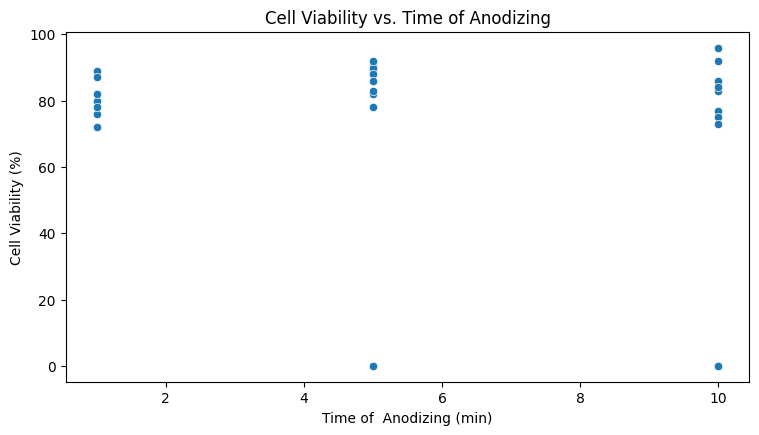

In [72]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 6)
sns.scatterplot(data=valid_sa, x='Time of  Anodizing (min)', y='Cell Viability (%)')
plt.title('Cell Viability vs. Time of Anodizing')

### 3. Data Preprocessing
- The data preprocessing stage is crucial to ensure the quality and readiness of the data for model training. This includes handling missing values, normalizing or standardizing features, and splitting the data into training and testing sets.

In [78]:
##  Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Instead of dropping, let's impute missing values
# Use mean for numeric columns (assuming all columns are numeric here)
data_imputed = data.fillna(data.mean())

# Verify if the data has been imputed correctly
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Separate features and target variables
feature_columns = ['Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching', 
                   'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)']
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

# Ensure columns exist in the cleaned dataset
for column in feature_columns + [target_column_sa, target_column_cv]:
    if column not in data_imputed.columns:
        raise ValueError(f"Column {column} not found in dataset.")

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

print("Features (X):\n", X.head())
print("Target (y_sa):\n", y_sa.head())
print("Target (y_cv):\n", y_cv.head())

# Normalize or standardize features
scaler = StandardScaler()

# Ensure that features are not empty and have valid shapes
if X.empty or X.shape[0] < 1 or X.shape[1] < 1:
    raise ValueError(f"Features are empty or have invalid shape: {X.shape}")

X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Missing values:
 Angle of Sandblasting                              0
Pressure of Sandblasting (bar)                     0
Temperture of Acid Etching                         0
Time of Acid Etching (min)                         0
Voltage of Anodizing (v)                           0
Time of  Anodizing (min)                           0
(Sa) Average of Surface roughness (micrometer)     0
Cell Viability (%)                                 0
Unnamed: 8                                        68
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           68 non-null     int64  
 1   Pressure of Sandblasting (bar)                  68 non-null     int64  
 2   Temperture of Acid Etching                      68 non-null     int64  
 3   T

### 4. Feature Engineering
- Creating new features from the existing ones to improve the performance of machine learning models. This can include interaction terms, polynomial features, and other derived metrics that may capture additional information

In [88]:
##  Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Ensure all features are numeric for PolynomialFeatures
numeric_features = ['Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching', 
                    'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)']

# Ensure that we only use numeric data
X_numeric = X[numeric_features]

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_numeric)

# Get feature names
poly_feature_names = poly.get_feature_names_out(numeric_features)
print("Polynomial Feature Names:\n", poly_feature_names)

# Create a DataFrame with new features
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
print("Polynomial Features DataFrame:\n", X_poly_df.head())

# Update X with new features
X = X_poly_df

# Normalize or standardize new features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv, test_size=0.2, random_state=42)

print("Training set size after feature engineering:", X_train.shape)
print("Testing set size after feature engineering:", X_test.shape)


Polynomial Feature Names:
 ['Angle of Sandblasting' 'Pressure of Sandblasting (bar)'
 'Temperture of Acid Etching' 'Time of Acid Etching (min)'
 'Voltage of Anodizing (v)' 'Time of  Anodizing (min)'
 'Angle of Sandblasting^2'
 'Angle of Sandblasting Pressure of Sandblasting (bar)'
 'Angle of Sandblasting Temperture of Acid Etching'
 'Angle of Sandblasting Time of Acid Etching (min)'
 'Angle of Sandblasting Voltage of Anodizing (v)'
 'Angle of Sandblasting Time of  Anodizing (min)'
 'Pressure of Sandblasting (bar)^2'
 'Pressure of Sandblasting (bar) Temperture of Acid Etching'
 'Pressure of Sandblasting (bar) Time of Acid Etching (min)'
 'Pressure of Sandblasting (bar) Voltage of Anodizing (v)'
 'Pressure of Sandblasting (bar) Time of  Anodizing (min)'
 'Temperture of Acid Etching^2'
 'Temperture of Acid Etching Time of Acid Etching (min)'
 'Temperture of Acid Etching Voltage of Anodizing (v)'
 'Temperture of Acid Etching Time of  Anodizing (min)'
 'Time of Acid Etching (min)^2'
 'Time 

### 5. Model Training
- To identify the best model for predicting optimal sandblasting conditions for dental implants, we will experiment with various machine learning models. This includes Linear Regression, Random Forest, Gradient Boosting, and Neural Networks.


In [89]:
## for Training and Evaluating Models

## Model Training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
}

# Initialize dictionary to store model performance
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Cross-validation for Surface Roughness (Sa)
    cv_scores_sa = cross_val_score(model, X_train, y_sa_train, cv=5, scoring='neg_mean_absolute_error')
    mae_sa = -cv_scores_sa.mean()
    
    # Cross-validation for Cell Viability
    cv_scores_cv = cross_val_score(model, X_train, y_cv_train, cv=5, scoring='neg_mean_absolute_error')
    mae_cv = -cv_scores_cv.mean()
    
    # Store results
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MAE (CV)": mae_cv
    }
    
    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")

# Convert performance to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Train the best model on the entire training set and evaluate on the test set
best_model_name = performance_df['MAE (Sa)'].idxmin()
best_model = models[best_model_name]
best_model.fit(X_train, y_sa_train)
y_sa_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
test_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
test_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
test_r2_sa = r2_score(y_sa_test, y_sa_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Test MAE (Sa): {test_mae_sa:.4f}")
print(f"Test RMSE (Sa): {test_rmse_sa:.4f}")
print(f"Test R2 (Sa): {test_r2_sa:.4f}")


Training Linear Regression...
Linear Regression - MAE (Sa): 0.2536, MAE (CV): 46.7058
Training Random Forest...
Random Forest - MAE (Sa): 0.2173, MAE (CV): 27.8033
Training Gradient Boosting...
Gradient Boosting - MAE (Sa): 0.2237, MAE (CV): 24.9727
Training Neural Network...


c:\Users\Farshid Hesami\anaconda3\envs\mlProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Farshid Hesami\anaconda3\envs\mlProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Farshid Hesami\anaconda3\envs\mlProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - MAE (Sa): 0.3214, MAE (CV): 32.7795

Model Performance:
                    MAE (Sa)   MAE (CV)
Linear Regression  0.253609  46.705784
Random Forest      0.217316  27.803291
Gradient Boosting  0.223674  24.972674
Neural Network     0.321398  32.779451

Best Model: Random Forest
Test MAE (Sa): 0.2407
Test RMSE (Sa): 0.3192
Test R2 (Sa): 0.7134


### Hyperparameter Tuning :
- Hyperparameter tuning aims to find the best set of hyperparameters for a machine learning model to optimize its performance. Here’s how to perform hyperparameter tuning for the Random Forest and Gradient Boosting models,


In [93]:
## Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV for Random Forest
print("Tuning Random Forest...")
grid_search_rf.fit(X_train, y_sa_train)
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Fit GridSearchCV for Gradient Boosting
print("Tuning Gradient Boosting...")
grid_search_gb.fit(X_train, y_sa_train)
best_gb = grid_search_gb.best_estimator_
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Evaluate the best Random Forest model
y_sa_pred_rf = best_rf.predict(X_test)
rf_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred_rf)
rf_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_rf))
rf_r2_sa = r2_score(y_sa_test, y_sa_pred_rf)

print(f"Random Forest - Test MAE (Sa): {rf_mae_sa:.4f}")
print(f"Random Forest - Test RMSE (Sa): {rf_rmse_sa:.4f}")
print(f"Random Forest - Test R2 (Sa): {rf_r2_sa:.4f}")

# Evaluate the best Gradient Boosting model
y_sa_pred_gb = best_gb.predict(X_test)
gb_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred_gb)
gb_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_gb))
gb_r2_sa = r2_score(y_sa_test, y_sa_pred_gb)

print(f"Gradient Boosting - Test MAE (Sa): {gb_mae_sa:.4f}")
print(f"Gradient Boosting - Test RMSE (Sa): {gb_rmse_sa:.4f}")
print(f"Gradient Boosting - Test R2 (Sa): {gb_r2_sa:.4f}")

# Documenting best hyperparameters and performance
best_hyperparameters = {
    "Random Forest": grid_search_rf.best_params_,
    "Gradient Boosting": grid_search_gb.best_params_,
}

performance_metrics = {
    "Random Forest": {
        "MAE (Sa)": rf_mae_sa,
        "RMSE (Sa)": rf_rmse_sa,
        "R2 (Sa)": rf_r2_sa
    },
    "Gradient Boosting": {
        "MAE (Sa)": gb_mae_sa,
        "RMSE (Sa)": gb_rmse_sa,
        "R2 (Sa)": gb_r2_sa
    }
}

print("\nBest Hyperparameters:\n", best_hyperparameters)
print("\nPerformance Metrics:\n", performance_metrics)


Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Tuning Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Random Forest - Test MAE (Sa): 0.2523
Random Forest - Test RMSE (Sa): 0.2986
Random Forest - Test R2 (Sa): 0.7492
Gradient Boosting - Test MAE (Sa): 0.2419
Gradient Boosting - Test RMSE (Sa): 0.3034
Gradient Boosting - Test R2 (Sa): 0.7412

Best Hyperparameters:
 {'Random Forest': {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}, 'Gradient Boosting': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}}

Performance Metrics:
 {'Random Forest': {'MAE (Sa)': 0.25234514754023324, 'RMSE (Sa)': 0.29860729730679525, '

### Model Evaluation :
- To evaluate the best model (Gradient Boosting in this case) for predicting Surface Roughness (Sa) and Cell Viability.

Gradient Boosting - Test MAE (Sa): 0.2419
Gradient Boosting - Test RMSE (Sa): 0.3034
Gradient Boosting - Test R2 (Sa): 0.7412


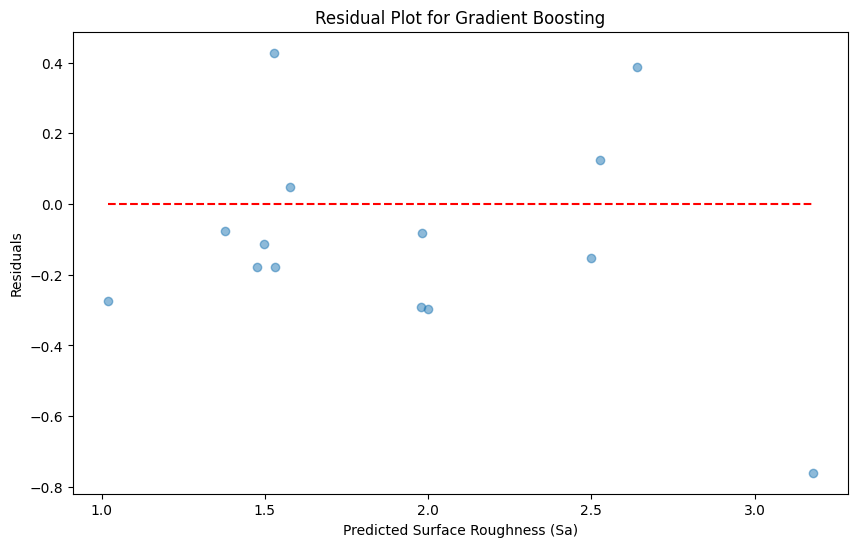

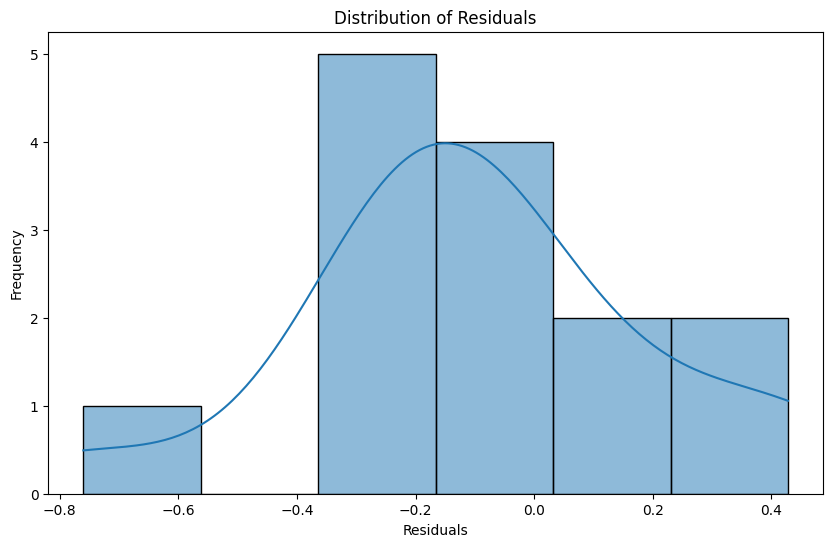

Gradient Boosting - Test MAE (CV): 67.0000
Gradient Boosting - Test RMSE (CV): 73.4756
Gradient Boosting - Test R2 (CV): -4.6287


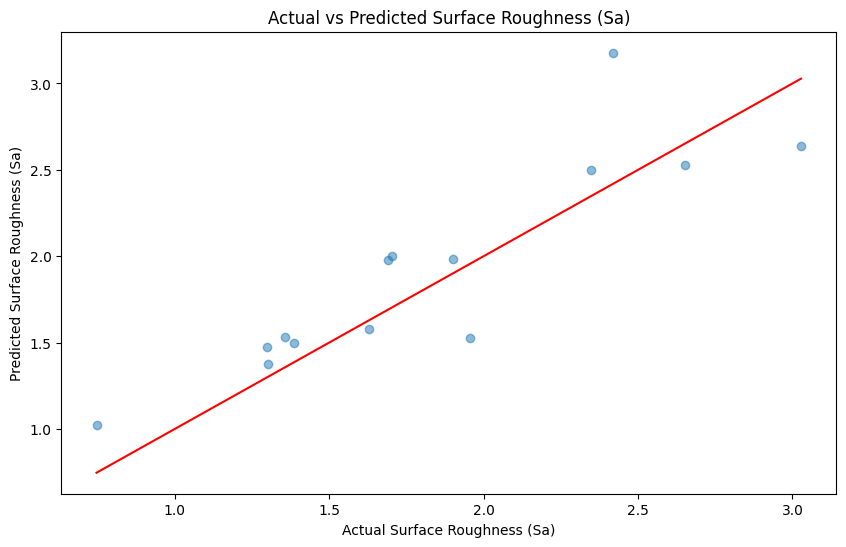

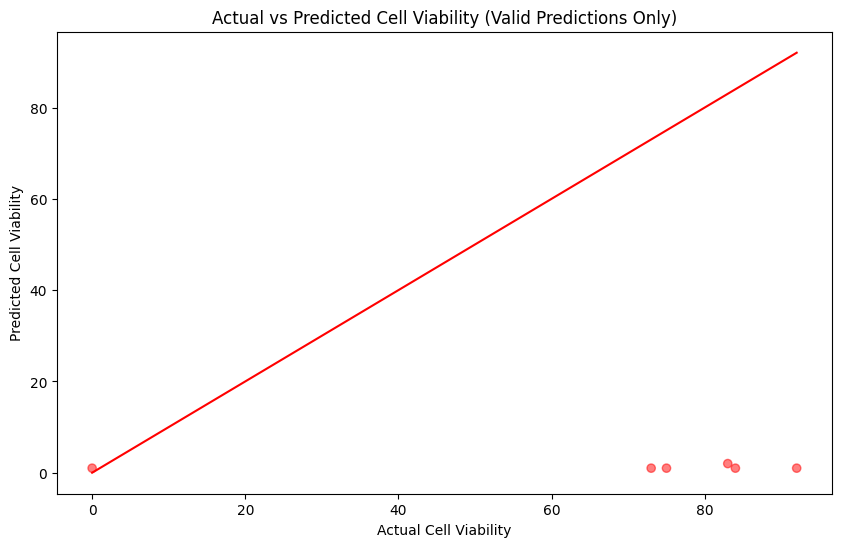

In [104]:
## Model Evaluation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best model is Gradient Boosting based on earlier results
best_model = best_gb

# Predictions on the test set for Surface Roughness
y_sa_pred = best_model.predict(X_test)

# Apply Surface Roughness Rule: Only make Cell Viability predictions if 1.5 < Sa < 2.5
valid_indices = (y_sa_pred > 1.5) & (y_sa_pred < 2.5)

# Initialize Cell Viability predictions as zeros for all, then update only valid indices
y_cv_pred = np.zeros_like(y_cv_test)
if any(valid_indices):
    y_cv_pred[valid_indices] = best_model.predict(X_test[valid_indices])

# Evaluation metrics for Surface Roughness (Sa)
mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
r2_sa = r2_score(y_sa_test, y_sa_pred)

print(f"Gradient Boosting - Test MAE (Sa): {mae_sa:.4f}")
print(f"Gradient Boosting - Test RMSE (Sa): {rmse_sa:.4f}")
print(f"Gradient Boosting - Test R2 (Sa): {r2_sa:.4f}")

# Residuals
residuals = y_sa_test - y_sa_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_sa_pred), xmax=max(y_sa_pred), color='r', linestyles='dashed')
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Evaluate Cell Viability (CV) for valid indices only
mae_cv = mean_absolute_error(y_cv_test[valid_indices], y_cv_pred[valid_indices])
rmse_cv = np.sqrt(mean_squared_error(y_cv_test[valid_indices], y_cv_pred[valid_indices]))
r2_cv = r2_score(y_cv_test[valid_indices], y_cv_pred[valid_indices])

print(f"Gradient Boosting - Test MAE (CV): {mae_cv:.4f}")
print(f"Gradient Boosting - Test RMSE (CV): {rmse_cv:.4f}")
print(f"Gradient Boosting - Test R2 (CV): {r2_cv:.4f}")

# Color coding for Cell Viability based on validity
valid_colors = np.where(y_cv_pred[valid_indices] > 90, 'green', 'red')

# Scatter plot of actual vs. predicted values for Surface Roughness
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_test, y_sa_pred, alpha=0.5)
plt.plot([min(y_sa_test), max(y_sa_test)], [min(y_sa_test), max(y_sa_test)], color='r')
plt.xlabel('Actual Surface Roughness (Sa)')
plt.ylabel('Predicted Surface Roughness (Sa)')
plt.title('Actual vs Predicted Surface Roughness (Sa)')
plt.show()

# Scatter plot of actual vs. predicted values for Cell Viability (valid predictions only)
plt.figure(figsize=(10, 6))
plt.scatter(y_cv_test[valid_indices], y_cv_pred[valid_indices], alpha=0.5, c=valid_colors)
plt.plot([min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], [min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], color='r')
plt.xlabel('Actual Cell Viability')
plt.ylabel('Predicted Cell Viability')
plt.title('Actual vs Predicted Cell Viability (Valid Predictions Only)')
plt.show()


### Predictions  :
- Surface Roughness and Cell Viability directly in the prediction function.

In [105]:
## Predictions

# Function to make predictions with validation rules
def make_predictions(X_new):
    y_sa_pred_new = best_model.predict(X_new)
    
    # Initialize Cell Viability predictions as zeros
    y_cv_pred_new = np.zeros(len(y_sa_pred_new))
    
    # Apply Surface Roughness Rule
    valid_indices_new = (y_sa_pred_new > 1.5) & (y_sa_pred_new < 2.5)
    
    if any(valid_indices_new):
        # Predict Cell Viability only for valid Surface Roughness predictions
        y_cv_pred_new[valid_indices_new] = best_model.predict(X_new[valid_indices_new])
    
    # Apply Cell Viability Rule for color coding
    color_codes = np.where(y_cv_pred_new > 90, 'green', 'red')
    
    return y_sa_pred_new, y_cv_pred_new, color_codes

# Example usage with new data
X_new = X_test  # Replace with new data
y_sa_pred_new, y_cv_pred_new, color_codes = make_predictions(X_new)

# Display predictions with color coding
results = pd.DataFrame({
    'Predicted Surface Roughness (Sa)': y_sa_pred_new,
    'Predicted Cell Viability (%)': y_cv_pred_new,
    'Validity': color_codes
})
print(results)


    Predicted Surface Roughness (Sa)  Predicted Cell Viability (%) Validity
0                           1.979066                      1.979066      red
1                           2.500159                      0.000000      red
2                           1.475741                      0.000000      red
3                           1.378237                      0.000000      red
4                           1.526936                      1.526936      red
5                           2.000427                      2.000427      red
6                           1.577470                      1.577470      red
7                           1.532470                      1.532470      red
8                           2.527606                      0.000000      red
9                           1.497421                      0.000000      red
10                          3.178127                      0.000000      red
11                          2.639783                      0.000000      red
12          

### Feature Importance  :
- Including Feature Importance analysis is crucial for understanding the contribution of each feature to the model's predictions. This analysis should be part of the Model Evaluation stage, specifically after evaluating the model's performance metrics.

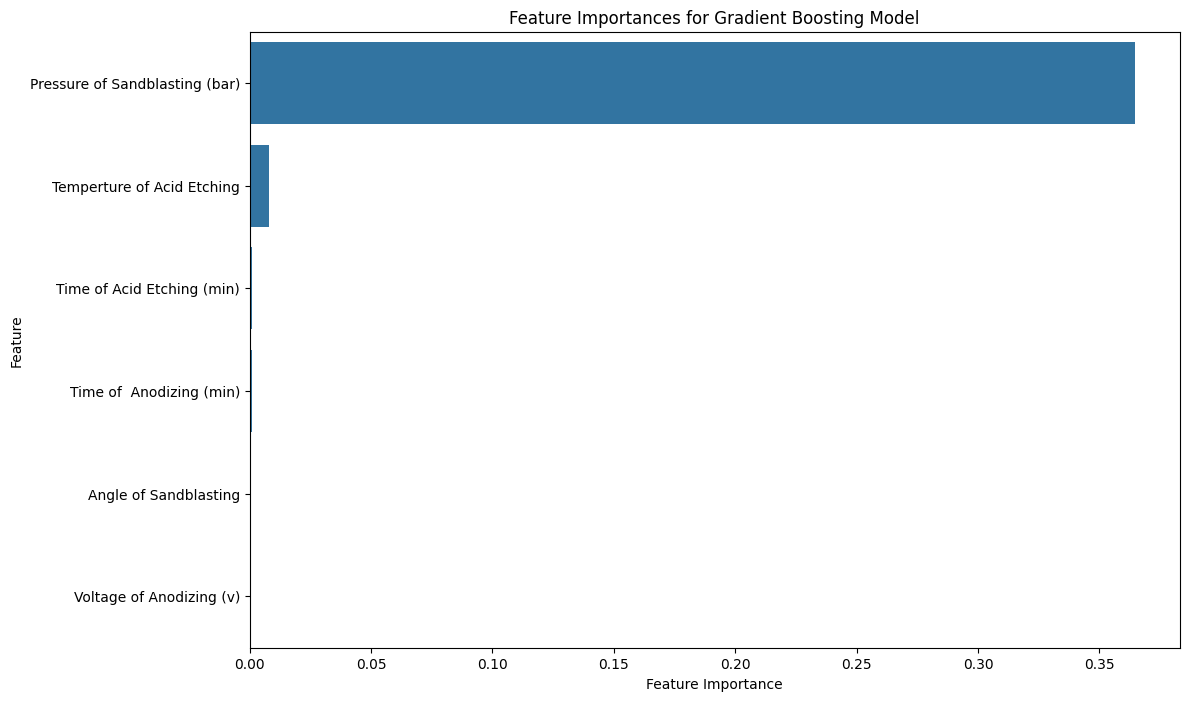

                          Feature  Importance
1  Pressure of Sandblasting (bar)    0.364824
2      Temperture of Acid Etching    0.007811
3      Time of Acid Etching (min)    0.001099
5        Time of  Anodizing (min)    0.000768
0           Angle of Sandblasting    0.000311
4        Voltage of Anodizing (v)    0.000211


In [106]:
## Feature Importance

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the feature names (these should be the same as the columns used in the original DataFrame)
feature_names = [
    'Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching',
    'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)'
]

# Generate polynomial features if they were used during training
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(X_train)  # To ensure the correct number of feature names

# Check if the model has feature importances
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances from the best model
    importances = best_model.feature_importances_
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances[:len(feature_names)]  # Use only the original feature names
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importances for Gradient Boosting Model')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

    # Print feature importance
    print(feature_importance_df)
else:
    print("The model does not have a `feature_importances_` attribute.")
